# 2. Functions Graphs Classification

In [ ]:
import fgraphs.classification

In [ ]:
from fgraphs import classification

## 2.1. Dataset loading

In [2]:
sets = classification.load_preprocess(preprocess_file="../datasets/LID_fg_dataset.pkl")

In [3]:
labels = {
    0: 'linear',
    1: 'quadrática',
    2: 'cúbica',
    3: 'exponencial',
    4: 'logarítmica',
    5: 'raíz quadrada',
    6: 'seno',
    7: 'cosseno',
    8: 'tangente',
    9: 'cotangente'
}

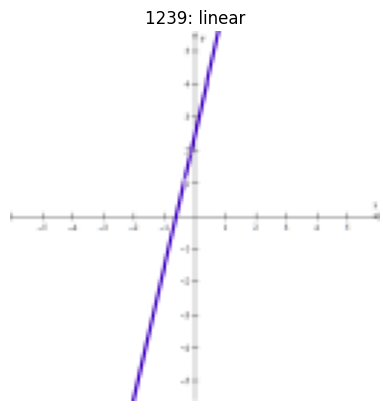

In [4]:
classification.show_image(
    x=sets["x"]["train"],
    y=sets["y"]["train"],
    labels=labels,
    n=None
)

# 2.2. Model building

In [5]:
input_shape = sets["x"]["train"][0].shape
input_shape

(128, 128, 3)

In [6]:
output_shape = len(labels)
output_shape

10

In [7]:
model = classification.build_cnn(
    input_shape=input_shape,
    conv1_filters=32,
    conv1_kernel_dim=3,
    activation_conv1="relu",
    mp1_dim=2,
    conv2_filters=64,
    conv2_kernel_dim=3,
    activation_conv2="relu",
    mp2_dim=2,
    conv3_filters=64,
    conv3_kernel_dim=3,
    activation_conv3="relu",
    dense1_units=128,
    activation_dense1="relu",
    dense2_units=output_shape,
    activation_dense2="softmax",
    lr=1e-3
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,480,266 (24.72 MB)

 Trainable params: 6,480,266 (24.72 MB)

 Non-trainable params: 0 (0.00 B)

## 2.3. Model fitting

In [8]:
history = classification.fit(
    model=model,
    x_train=sets["x"]["train"],
    y_train=sets["y"]["train"],
    x_validation=sets["x"]["validation"],
    y_validation=sets["y"]["validation"],
    epochs=40,
    es_patience=2
)

Epoch 1/40


2024-06-18 11:28:16.992665: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2280652800 exceeds 10% of free system memory.


363/363 ━━━━━━━━━━━━━━━━━━━━ 320s 873ms/step - accuracy: 0.4295 - loss: 1.5942 - val_accuracy: 0.9076 - val_loss: 0.2507
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 300s 826ms/step - accuracy: 0.9413 - loss: 0.1755 - val_accuracy: 0.9497 - val_loss: 0.2074
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 326s 837ms/step - accuracy: 0.9786 - loss: 0.0717 - val_accuracy: 0.9600 - val_loss: 0.1293
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 301s 829ms/step - accuracy: 0.9884 - loss: 0.0348 - val_accuracy: 0.9752 - val_loss: 0.0784
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 303s 834ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9848 - val_loss: 0.0547
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 308s 848ms/step - accuracy: 0.9975 - loss: 0.0070 - val_accuracy: 0.9814 - val_loss: 0.0663
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 303s 835ms/step - accuracy: 0.9947 - loss: 0.0181 - val_accuracy: 0.9766 - val_loss: 0.0913
Epoch 7: early stopping


## 2.4. Model evaluation

In [11]:
test_loss, test_acc = model.evaluate(
    x=sets["x"]["test"],
    y=sets["y"]["test"]
)

print("Test accuracy:", test_acc)

46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9761 - loss: 0.0951
Test accuracy: 0.9813793301582336


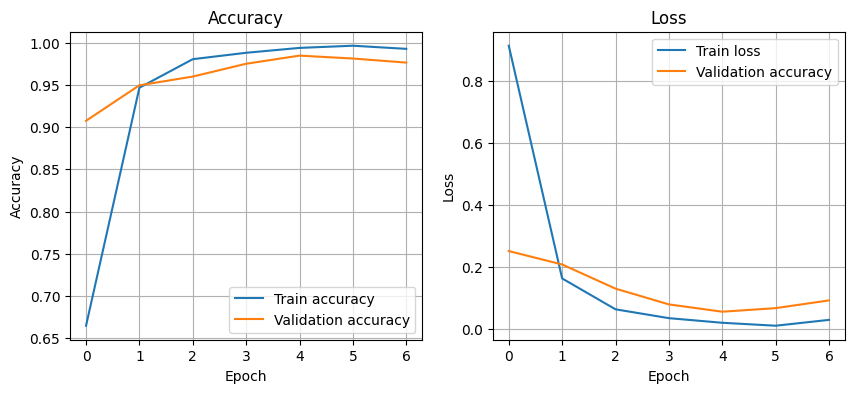

In [22]:
classification.plot_history(history)

## 2.5. Save Model

In [24]:
classification.save(
    model=model,
    history=history,
    model_path="../models/cnn_model.keras",
    history_path="../models/cnn_history.json"
)

## Find best hyperparameters

In [ ]:
tuner = classification.find_best_cnn_model(
    sets['x']['train'], sets['y']['train'],
    sets['x']['validation'], sets['y']['validation']
    )

In [ ]:
# Best hyperparameters for function graphs problem
best_hps_4_fgraphs = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters are:
- Nr of convolutional layers: {best_hps_4_fgraphs.get('conv_layers')}
- Filters in convolutional layers: {[best_hps_4_fgraphs.get('filters_' + str(i)) for i in range(best_hps_4_fgraphs.get('conv_layers'))]}
- Nr of neurons in dense layer: {best_hps_4_fgraphs.get('dense_units')}
- Activation function in dense layer: {best_hps_4_fgraphs.get('dense_activation')}
""")